### TensorFlow basic
1) Building a TensorFlow Graph
    - function definition  
2) Executing the TensorFlow Graph
    - function execution

In [2]:
import tensorflow.compat.v1 as tf # ver.1x
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
import numpy as np
import pandas as pd

In [5]:
a = tf.add(3, 5)
print(a)

Tensor("Add_1:0", shape=(), dtype=int32)


In [6]:
a = tf.add(3,5)
sess = tf.Session() # like : thread
print(sess.run(a)) # run : 실행

8


2022-06-28 09:23:59.923170: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [7]:
sess.close() # Session 종료: 사용 후 close

In [8]:
a = tf.add(3, 5) # Session close와 동일
with tf.Session() as sess:
    print(sess.run(a))

8


In [9]:
x = 2
y = 3
op1 = tf.add(x, y)
op2 = tf.multiply(x, y)
op3 = tf.pow(op2, op1) # 제곱

In [11]:
with tf.Session() as sess:
    op3 = sess.run(op3)
    print(op3)

7776


In [ ]:
'''
x = 2
y = 3
op1 = tf.add(x, y)
op2 = tf.multiply(x, y)
op3 = tf.pow(op2, op1) # 제곱
useless = tf.multiply(x, op1)

with tf.Session() as sess:
    op3, useless = sess.run([op3, useless])
    print(op3, useless)
'''

### TensorFlow basic - Linear Regression

In [12]:
# Prepare the data
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [13]:
x_data = datasets.load_boston().data[:,12]
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data, y_data]).transpose() # transpose 행 -> 열
df.head()

/Users/krc/miniforge3/envs/krc3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [16]:
# 2. Build the model
w = tf.Variable(tf.random_normal([1])) # parameter theta
b = tf.Variable(tf.random_normal([1])) # 1 : scalar 하나

# tf.Variable(초기화 방법)
# - Parameter theta
# - Gradient Descent의 대상
# - Learning 의 대상

y_predicted = w * x_data + b # : model

In [17]:
###
# 3. Set the criterion : Cost function & Gradient Descent method
# 평균제곱오차
loss = tf.reduce_mean(tf.square(y_predicted - y_data)) # reduce_mean : 평균
optimizer = tf.train.GradientDescentOptimizer(0.001) # full batch (basic form), 10^-3 : learning rate 
train = optimizer.minimize(loss) # -> run
###

In [18]:
# 4. Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variables 초기화
    
    for step in range(10000): # 10000 : epoch
        sess.run(train) # 실제로 Gradient Descent가 실행되는 코드
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()
            
    w_out, b_out = sess.run([w, b])

Step 0: w [-0.02277607] b [-0.634063]
loss 632.3831787109375

Step 1000: w [0.35349724] b [12.841534]
loss 152.19593811035156

Step 2000: w [-0.14408587] b [21.129444]
loss 81.9527587890625

Step 3000: w [-0.45173478] b [26.253748]
loss 55.100399017333984

Step 4000: w [-0.6419492] b [29.422022]
loss 44.835411071777344

Step 5000: w [-0.7595556] b [31.380913]
loss 40.91135787963867

Step 6000: w [-0.8322709] b [32.592083]
loss 39.4112663269043

Step 7000: w [-0.8772287] b [33.340916]
loss 38.837833404541016

Step 8000: w [-0.9050244] b [33.803894]
loss 38.618621826171875

Step 9000: w [-0.92221135] b [34.09016]
loss 38.534828186035156



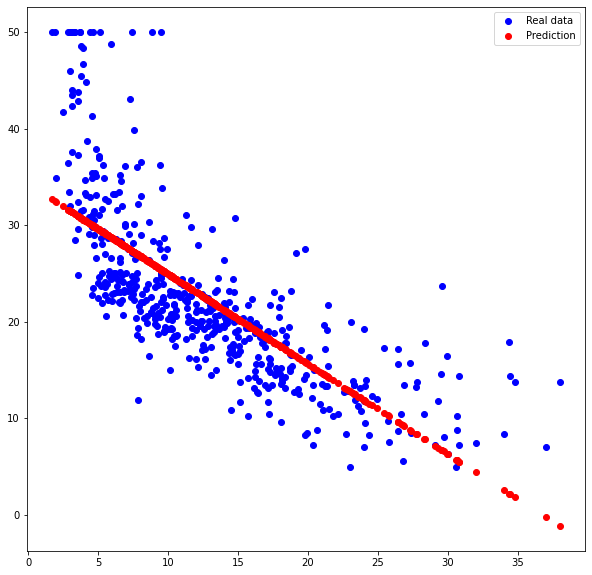

In [19]:
# Visualize the result
plt.figure(figsize=(10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

### Regression with Neural Network

In [20]:
# 2. Build the model
_x_data = tf.reshape(x_data, [len(x_data), 1]) # [506, ] -> [506, 1]

W = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64)) # parameter theta 5 [1, 5]
W_out = tf.Variable(tf.random_normal([5, 1], dtype=tf.float64)) # [5, 1] -> [506, 1]

hidden = tf.nn.sigmoid(tf.matmul(_x_data, W)) # ReLu, tanh, ...
output = tf.matmul(hidden, W_out)

In [21]:
# 3. Set the criterion : Cost function & Gradient Descent method
loss = tf.reduce_mean(tf.square(output - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [23]:
# Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variables 초기화
    
    for step in range(50000): # 10000 : epoch
        sess.run(train) # 실제로 Gradient Descent가 실행되는 코드
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

            
    output = sess.run(output)

Step 0 || Loss : 615.0728356908929
Step 5000 || Loss : 84.44047820747845
Step 10000 || Loss : 84.43345968668483
Step 15000 || Loss : 84.43009013720511
Step 20000 || Loss : 84.4280802115904
Step 25000 || Loss : 84.4267348043949
Step 30000 || Loss : 84.42576674636557
Step 35000 || Loss : 84.42503467679715
Step 40000 || Loss : 84.42446052668473
Step 45000 || Loss : 84.42399750073663


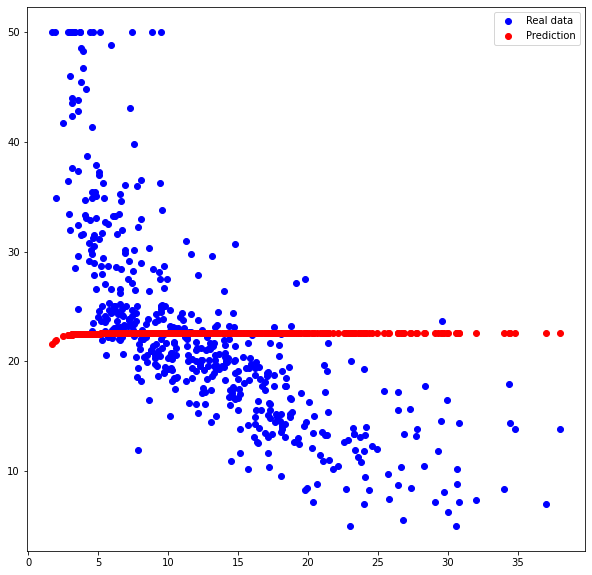

In [24]:
# Visualize the result
plt.figure(figsize=(10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

hidden layers 1 -> 2  
sigmoid -> ReLu

In [25]:
# 2. Build the model
# hidden layers 1 -> 2
_x_data = tf.reshape(x_data, [len(x_data), 1])

W1 = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64))
W2 = tf.Variable(tf.random_normal([5, 10], dtype=tf.float64)) 
W_out = tf.Variable(tf.random_normal([10, 1], dtype=tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out)

In [26]:
# 3. Set the criterion
loss = tf.reduce_mean(tf.square(output - y_data))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

In [27]:
# Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variables 초기화
    
    for step in range(50000): # 10000 : epoch
        sess.run(train) # 실제로 Gradient Descent가 실행되는 코드
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

            
    output = sess.run(output)

Step 0 || Loss : 1504.3121561977334
Step 5000 || Loss : 84.42907224994663
Step 10000 || Loss : 84.41997535658699
Step 15000 || Loss : 84.4195882249994
Step 20000 || Loss : 84.4195585853536
Step 25000 || Loss : 84.41955670091264
Step 30000 || Loss : 84.41955986420085
Step 35000 || Loss : 84.4195562286193
Step 40000 || Loss : 84.41959122811775
Step 45000 || Loss : 84.41955620174663


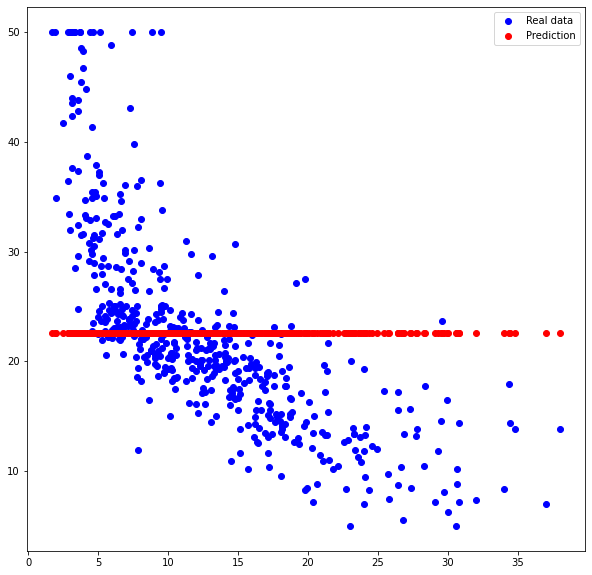

In [28]:
# Visualize the result
plt.figure(figsize=(10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

y_data.shpe = (506, )  
shape, demention error
### Corret!

In [41]:
# 2. Build the model
# hidden layers 1 -> 2
_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(y_data), 1])

W1 = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64))
W2 = tf.Variable(tf.random_normal([5, 10], dtype=tf.float64)) 
W_out = tf.Variable(tf.random_normal([10, 1], dtype=tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out)

In [42]:
# 3. Set the criterion
loss = tf.losses.mean_squared_error(output, _y_data) # mean_squared_error
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

In [43]:
# Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variables 초기화
    
    for step in range(50000): # 10000 : epoch
        sess.run(train) # 실제로 Gradient Descent가 실행되는 코드
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

            
    output = sess.run(output)

Step 0 || Loss : 441.7461242675781
Step 5000 || Loss : 27.869043350219727
Step 10000 || Loss : 26.371782302856445
Step 15000 || Loss : 26.1778621673584
Step 20000 || Loss : 26.169614791870117
Step 25000 || Loss : 26.120723724365234
Step 30000 || Loss : 26.10965919494629
Step 35000 || Loss : 26.1047306060791
Step 40000 || Loss : 26.091936111450195
Step 45000 || Loss : 26.084922790527344


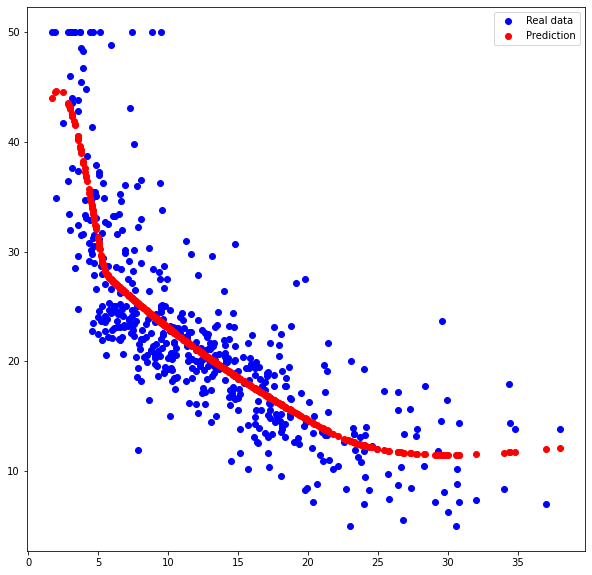

In [44]:
# Visualize the result
plt.figure(figsize=(10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()